# Visualization & Clustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Data

In [6]:
stdData = pd.read_csv("./data/stdHTRU_2.csv")

## Visualization

In order to visualize the data in 2D, we will perform PCA on the standardized data set, using PCA class.

In [7]:
from sklearn.decomposition import PCA

In [10]:
# PCA to project data in 2 dimensions
pca = PCA(n_components = 2)
pcaData = pca.fit_transform(stdData)
pcaData = pd.DataFrame(pcaData)

# Include class to the dataframe
pcaData = pd.concat([pcaData, stdData[['class']]], axis = 1)

Visualization of the resulting data:

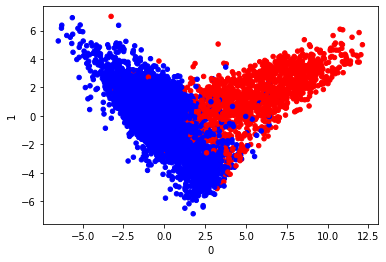

In [12]:
# Plot data with color per class
col = pcaData['class'].map({1:'r', 0:'b'})
pcaData.plot.scatter(x = 0, y = 1, c = col)

We can appreciate that there are two differentiated clusters, at least visually, with an intermingled center.

## Clustering

Scikit-learn provides many clustering methods. We will use K-Means because works fine with very large number of samples and medium number of clusters, besides being a general-purpose method.

In [20]:
from sklearn.cluster import KMeans

In order to evaluate the quality of the clustering, we will usea the Calinski-Harabasz (CH) score.

In [21]:
from sklearn.metrics import calinski_harabasz_score

In [41]:
def evaluateK(ks, data):
    results = [0 for x in range(len(ks))]
    for i in range(0,len(ks)):
        for j in range(0,50):
            kmean = KMeans(n_clusters = ks[i], n_jobs = -1)
            kmean.fit(data)
            results[i] += calinski_harabasz_score(data, kmean.labels_ )
        results[i] /= 50
    return results

Range of clusters:

In [42]:
ks = list(range(2,13))
print(ks)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


Analizaremos la agrupación con los datos normalizados normalizados y con los datos de PCA.

### Normal Data

In [43]:
resultsND = evaluateK(ks, stdData)

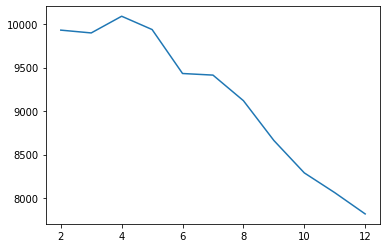

In [44]:
plt.plot(ks,resultsND)

In [45]:
print("Best result: " + str(ks[resultsND.index(max(resultsND))]))

Best result: 4


### PCA Data

In [74]:
resutlsPCA = evaluateK(ks, pcaData)

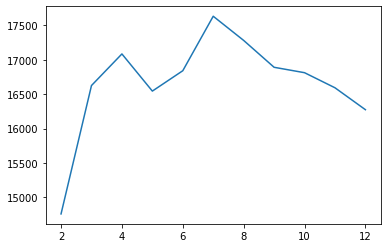

In [75]:
plt.plot(ks,resutlsPCA)

In [76]:
print("Best result: " + str(ks[resutlsPCA.index(max(resutlsPCA))]))

Best result: 7


Let's visualize the clustering.

1. Optimal value: 7

In [81]:
kmeans = KMeans(n_clusters = 7, n_jobs = -1)
kmeans.fit(pcaData)
y_kmeans = kmeans.predict(pcaData)

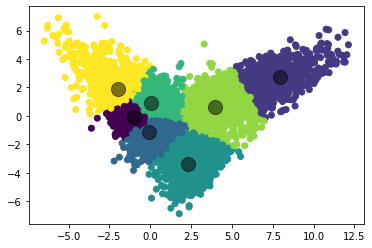

In [82]:
plt.scatter(pcaData.iloc[:, 0], pcaData.iloc[:, 1], c=y_kmeans, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

2. Suboptimal value: 4

In [83]:
kmeans = KMeans(n_clusters = 4, n_jobs = -1)
kmeans.fit(pcaData)
y_kmeans = kmeans.predict(pcaData)

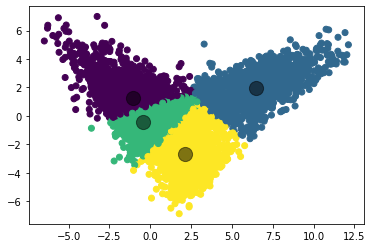

In [84]:
plt.scatter(pcaData.iloc[:, 0], pcaData.iloc[:, 1], c=y_kmeans, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

2. Optimum assumed value: 2

In [86]:
kmeans = KMeans(n_clusters = 2, n_jobs = -1)
kmeans.fit(pcaData)
y_kmeans = kmeans.predict(pcaData)

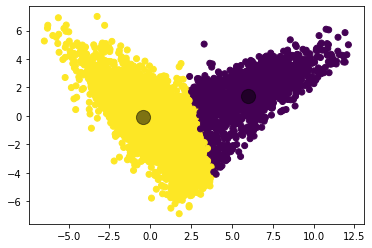

In [87]:
plt.scatter(pcaData.iloc[:, 0], pcaData.iloc[:, 1], c=y_kmeans, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)